In [1]:
!pwd

/home/mln/GIT/0_EXPLORE/github/astronomer-codespaces-test/data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the DataFrame from the Parquet file
df = pd.read_parquet('numbikesavailable.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34952 entries, 0 to 34951
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   record_timestamp  34952 non-null  datetime64[us, UTC]
 1   total_bikes       34952 non-null  float64            
dtypes: datetime64[us, UTC](1), float64(1)
memory usage: 546.2 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34952 entries, 0 to 34951
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   record_timestamp  34952 non-null  datetime64[us, UTC]
 1   total_bikes       34952 non-null  float64            
dtypes: datetime64[us, UTC](1), float64(1)
memory usage: 546.2 KB


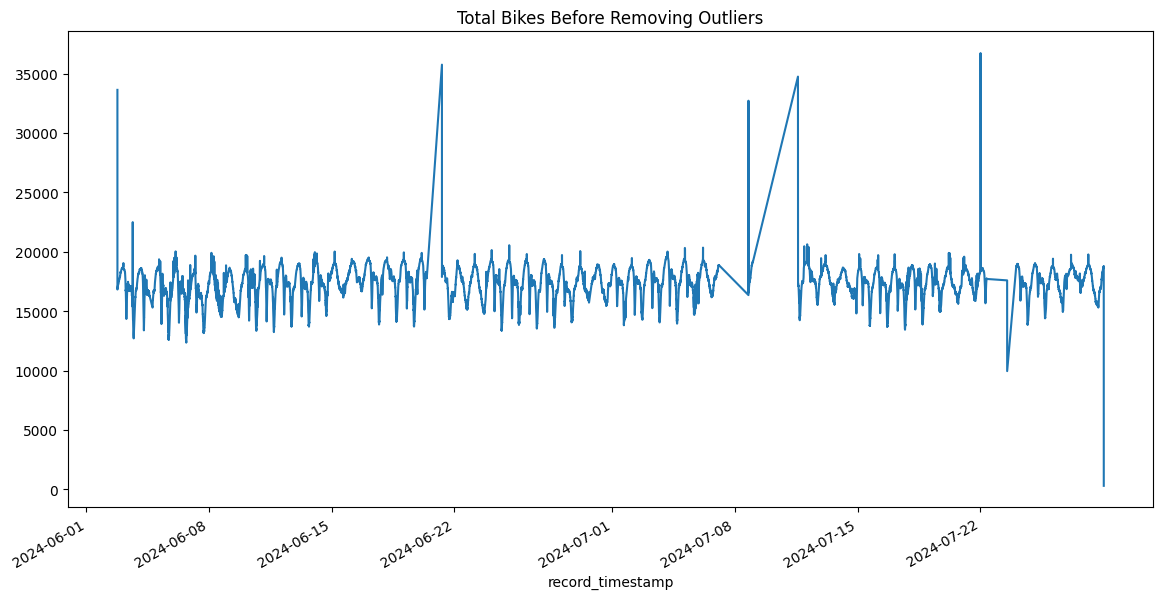

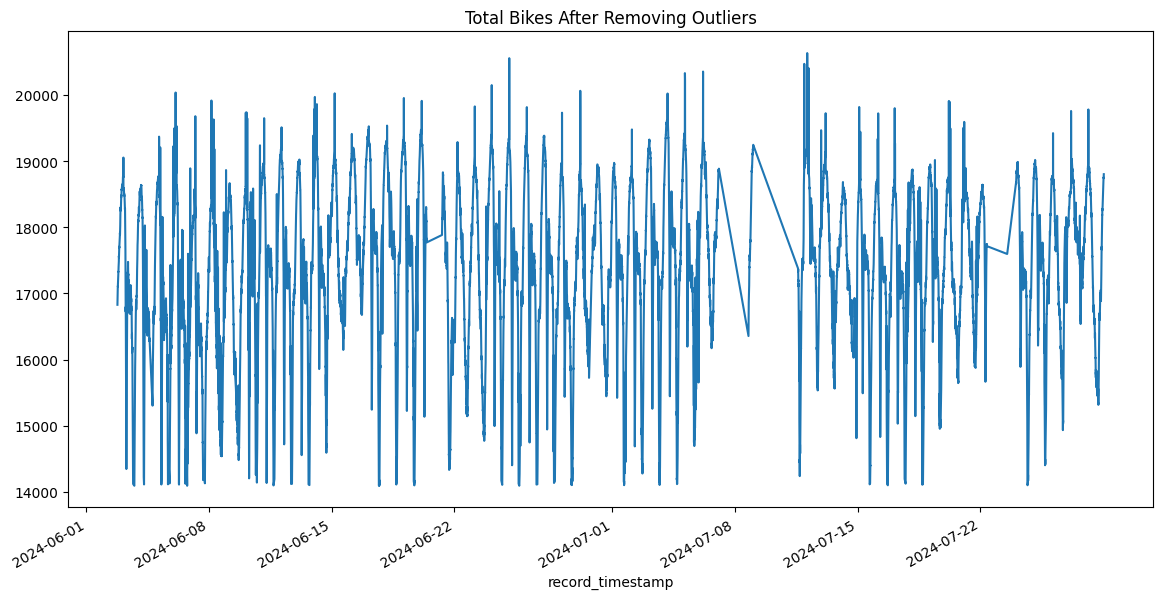

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34219 entries, 2024-06-02 18:39:00.474000+00:00 to 2024-07-29 00:55:01.431000+00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bikes  34219 non-null  float64
dtypes: float64(1)
memory usage: 534.7 KB


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the DataFrame from the Parquet file
df = pd.read_parquet('numbikesavailable.parquet')
df.info()

# Convert 'record_timestamp' to a datetime index if it's not already
df['record_timestamp'] = pd.to_datetime(df['record_timestamp'])
df.set_index('record_timestamp', inplace=True)

# Sort the DataFrame by index
df = df.sort_index()

# Plot the original data
plt.figure(figsize=(14, 7))
ts = pd.Series(df['total_bikes'].values, index=df.index)
ts.plot(title='Total Bikes Before Removing Outliers')
plt.show()

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_bikes'].quantile(0.25)
Q3 = df['total_bikes'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['total_bikes'] >= lower_bound) & (df['total_bikes'] <= upper_bound)]

# Plot the data after removing outliers
plt.figure(figsize=(14, 7))
ts_no_outliers = pd.Series(df_no_outliers['total_bikes'].values, index=df_no_outliers.index)
ts_no_outliers.plot(title='Total Bikes After Removing Outliers')
plt.show()

# Show the info of the cleaned DataFrame
df_no_outliers.info()


In [3]:
import numpy as np


ts = pd.Series(df['total_bikes'].values, index=df['record_timestamp'])
ts = ts.sort_index()
ts.plot()


KeyError: 'record_timestamp'

In [ ]:
import pandas as pd
import duckdb

file_path = "merged_data.parquet"

df = duckdb.read_parquet(file_path) 
df.df().info()

In [ ]:
import pandas as pd
import duckdb

# Start an in-memory DuckDB database
con = duckdb.connect()

# Path to your Parquet file
file_path = "merged_data.parquet"

# Load the Parquet file into a DuckDB table
con.execute(
    f"""
    CREATE TABLE velib_global AS 
        SELECT record_timestamp, stationcode, numbikesavailable, mechanical, ebike
        FROM read_parquet('{file_path}')
    """
)



In [ ]:
con.execute("SELECT * FROM velib_global").df().info()


CatalogException: Catalog Error: Table with name velib_global does not exist!
Did you mean "pg_am"?

In [ ]:
!poetry add matplotlib

Using version ^3.9.1 for matplotlib

Updating dependencies
Resolving dependencies... (0.6s)

Package operations: 7 installs, 0 updates, 0 removals

  - Installing contourpy (1.2.1): Pending...
  - Installing cycler (0.12.1): Pending...
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Pending...
  - Installing pyparsing (3.1.2): Pending...
  - Installing pyparsing (3.1.2): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing cycler (0.12.1): Downloading... 0%
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing pypar

<Axes: xlabel='record_timestamp'>

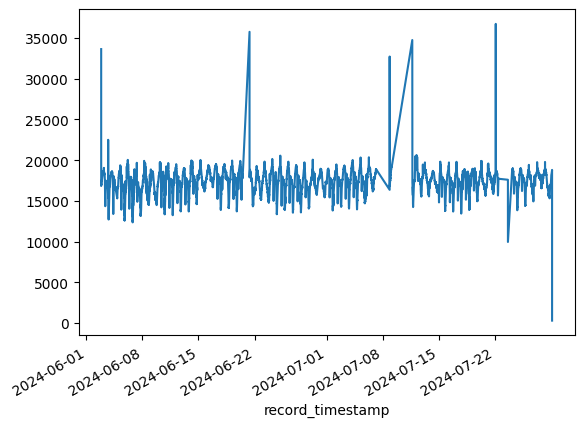

In [ ]:
agg = con.execute(
       """
       SELECT record_timestamp, SUM(numbikesavailable) AS total 
       FROM velib_global
       GROUP BY record_timestamp
       ORDER BY record_timestamp ASC;
"""
)
agg_df = agg.df()

ts = pd.Series(agg_df['total'].values, index=agg_df['record_timestamp'])

ts.plot()


In [ ]:
import pandas as pd
import duckdb


df = pd.read_parquet('merged_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51935527 entries, 0 to 51935526
Data columns (total 15 columns):
 #   Column             Dtype                  
---  ------             -----                  
 0   id                 float64                
 1   record_timestamp   datetime64[us, Etc/UTC]
 2   stationcode        object                 
 3   ebike              int64                  
 4   mechanical         int64                  
 5   duedate            object                 
 6   numbikesavailable  int64                  
 7   numdocksavailable  int64                  
 8   capacity           int64                  
 9   is_renting         object                 
 10  is_installed       object                 
 11  is_returning       object                 
 12  name               object                 
 13  latitude           float64                
 14  longitude          float64                
dtypes: datetime64[us, Etc/UTC](1), float64(3), int64(5), object(6)
m

In [ ]:
import pandas as pd



df = pd.read_parquet('locations_backup.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stationcode                  1496 non-null   object 
 1   name                         1496 non-null   object 
 2   latitude                     1496 non-null   float64
 3   longitude                    1496 non-null   float64
 4   nom_arrondissement_communes  1496 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.6+ KB


In [ ]:
import pandas as pd



df = pd.read_csv('donnees-synop-essentielles-omm.csv')
df.info()

ParserError: Error tokenizing data. C error: Expected 5 fields in line 5, saw 8
